# MNIST

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [8]:
def get_concat(foldername, seeds):
    for i, seed in enumerate(seeds):
        if i == 0: data = pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))
        else: 
            try: 
                data = pd.concat([data, pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))])
            except:
                pass
    # print(foldername, len(data))
    return data

def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"] + data["gn"].astype(str)
        if "LR" in path:
            data["LR"] = float(path.split("LR")[1][:3])
        else:
            data["LR"] = 0.1
        if "fedavg-G00-B0" in path:
            data["Mode"] = "G00"
        # elif "LN11+G10" in path:
        #     data["Mode"] = "LN11+G10"
        # elif "LN11+G00" in path:
        #     data["Mode"] = "LN11+G00"
        elif "LN00+G00" in path:
            data["Mode"] = "LN00+G00"
        # elif "LN01+G01" in path:
        #     data["Mode"] = "LN01+G01"
        # elif "LN01+G00" in path:
        #     data["Mode"] = "LN01+G00"
        elif "LN22+G11" in path:
            data["Mode"] = "LN22+G11"
        elif "LN22+G01" in path:
            data["Mode"] = "LN22+G01"
        elif "LN22+G10" in path:
            data["Mode"] = "LN22+G10"
        elif "LN22+G00" in path:
            data["Mode"] = "LN22+G00"
        elif "LN02+G01" in path:
            data["Mode"] = "LN02+G01"
        elif "LN02+G00" in path:
            data["Mode"] = "LN02+G00"
        elif "LN02+G10" in path:
            data["Mode"] = "LN02+G10"
        elif "LN02+G11" in path:
            data["Mode"] = "LN02+G11"
        elif "BN00+G00" in path:
            data["Mode"] = "BN00+G00"
        elif "BN00+G01" in path:
            data["Mode"] = "BN00+G01"
        else:
            continue
        if len(data_) == 0: 
            data_ = data
        else: 
            data_ = pd.concat([data_, data])
    return data_

In [10]:
import seaborn as sns
import copy

def load_data():
    datas = list()
    save_path = "../Output/CIFAR100-fedavg-0223*-P0.*/s[1-9].csv"
    path_list = glob.glob(save_path)
    save_path = "../Output/CIFAR100-fedavg-G00-B0-D0-N100*/s[1-9].csv"
    # print(glob.glob(save_path))
    path_list += glob.glob(save_path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    # data_temp['Mode'] = data_temp['Mode'] .map({'fedavg0': "FedAvg", 
    #                                             'fedprox0': "FedProx", 
    #                                             'scaffold0': "Scaffold",  
    #                                             'feddyn0': "FedDyn", 
    #                                             'G11': "FedGN",
    #                                            })
    print(data_temp["Mode"].unique())
    # sk = ["Balanced IID partition", "Balanced Dirichlet partition (α=0.3)"]
    # data_temp = data_temp.set_index('Distribution').loc[sk].reset_index()
    # sk = ['G00', 'G11', "L01", "L02", "L10", "L11", "L12", "L20", "L21", "L22", "L00G1"]
    # sk = ['G00', 'G11', "L10", "L02", "L20", "L22", "L00G1", "L02G1", "2L00G1", "2L00G1B11"]
    # data_temp = data_temp.set_index('Mode').loc[sk].reset_index()
    print(data_temp.size)
    return data_temp

['BN00+G00' 'LN02+G01' 'LN22+G11' 'BN00+G01' 'LN22+G10' 'LN22+G01'
 'LN00+G00' 'LN02+G11' 'LN02+G10' 'LN22+G00' 'LN02+G00' 'G00']
56679
(2699, 21)
(1103, 21)


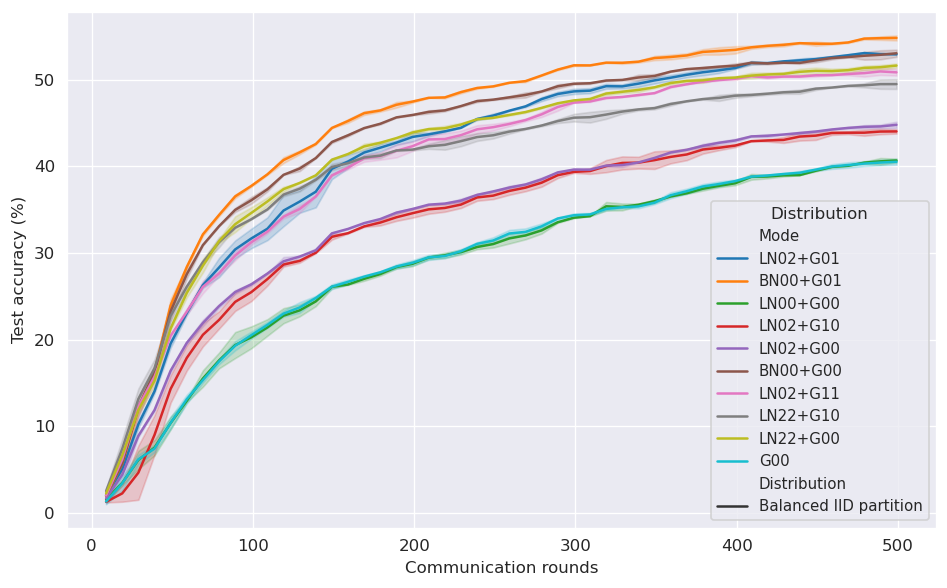

In [27]:
data_temp = load_data()
print(data_temp.shape)
fig, axes = plt.subplots(1, 1, figsize=(8,5), dpi=120, sharey=True)
sns.set_style("darkgrid")
ax = axes
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == .01]
temp = temp[temp["epoch"] <= 499]
# temp = temp[(temp["LR"] == 0.1)]
temp = temp[temp["Distribution"] == "Balanced IID partition"]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style = "Distribution", errorbar="sd")

ax = axes
ax.set_xlabel("Communication rounds"), ax.set_ylabel("Test accuracy (%)"), 
axes.legend(title="Distribution", loc=4, prop={'size': 9}),
fig.tight_layout()

['BN00+G00' 'LN22+G01' 'LN02+G01' 'LN22+G11' 'BN00+G01' 'LN22+G10'
 'LN02+G11' 'LN00+G00' 'LN02+G10' 'LN22+G00' 'LN02+G00' 'G00']
69195
(3295, 21)
(600, 21)


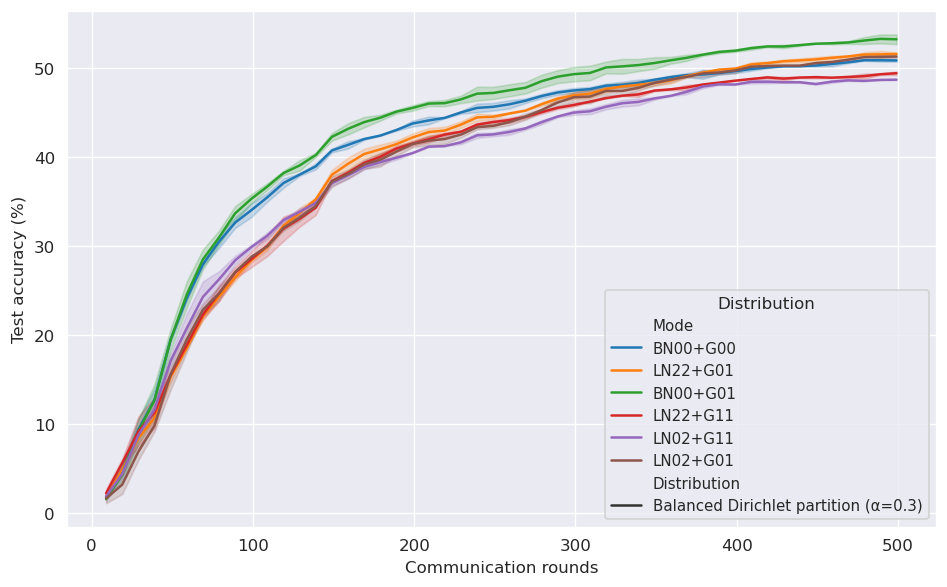

In [34]:
data_temp = load_data()
print(data_temp.shape)
fig, axes = plt.subplots(1, 1, figsize=(8,5), dpi=120, sharey=True)
sns.set_style("darkgrid")
ax = axes
temp = copy.deepcopy(data_temp)
temp = temp[temp["act_prob"] == .01]
temp = temp[temp["epoch"] <= 499]
# temp = temp[(temp["LR"] == 0.1)]
temp = temp[temp["Distribution"] != "Balanced IID partition"]
print(temp.shape)
ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="Mode", style = "Distribution", errorbar="sd")

ax = axes
ax.set_xlabel("Communication rounds"), ax.set_ylabel("Test accuracy (%)"), 
axes.legend(title="Distribution", loc=4, prop={'size': 9}),
fig.tight_layout()